In [1]:
import numpy as np

# Step 1: Define priors
# P(H): prior probabilities for the two hypotheses
# H1: fair coin, H2: biased coin
priors = np.array([0.5, 0.5])  # equal prior belief

# Step 2: Define likelihoods
# P(E | H): probability of observing "Heads" given each hypothesis
likelihoods = np.array([0.5, 0.9])  # P(Heads | Fair), P(Heads | Biased)

# Step 3: Compute evidence (normalizing constant)
evidence = np.sum(likelihoods * priors)  # P(Heads)

# Step 4: Compute posterior using Bayes' rule
# P(H | E) ∝ P(E | H) * P(H)
unnormalized_posteriors = likelihoods * priors
posterior = unnormalized_posteriors / evidence

# Output the result
print("Posterior probability of each hypothesis given 'Heads':")
print(f"P(Fair | Heads)  = {posterior[0]:.4f}")
print(f"P(Biased | Heads) = {posterior[1]:.4f}")


Posterior probability of each hypothesis given 'Heads':
P(Fair | Heads)  = 0.3571
P(Biased | Heads) = 0.6429


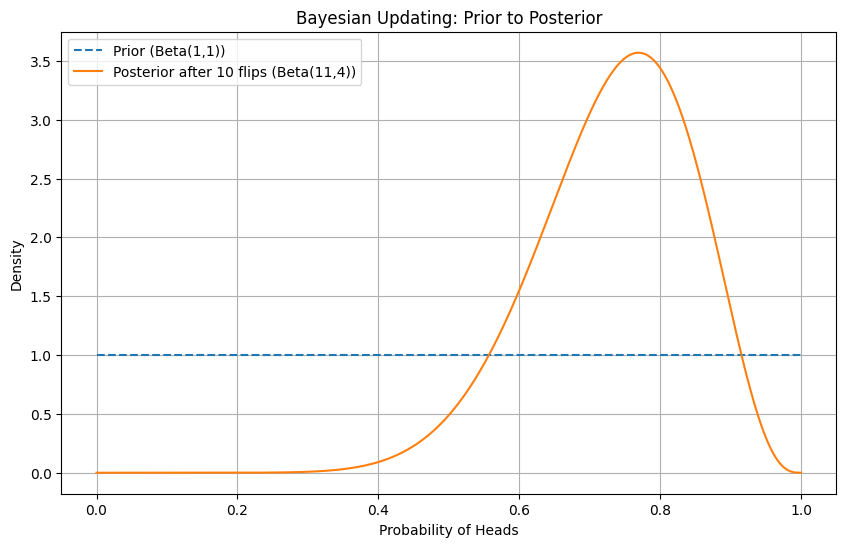

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Initial prior parameters
#Prior belief: a uniform distribution (Beta(1, 1))
alpha_prior = 1 # ↔ α₀: prior 'pseudo-count' of heads
beta_prior = 1  # ↔ β₀: prior 'pseudo-count' of tails

# These are your observed data — used in the likelihood.
# First observation: 10 heads, 3 tails
heads = 10 # ↔ observed heads (successes) = x
tails = 3 # ↔ observed tails (failures) = n - x

# Update posterior
# This is the Bayesian update step — the core of Bayes’ theorem in conjugate prior form:
alpha_post = alpha_prior + heads # ↔ α_post = α_prior + observed_heads
beta_post = beta_prior + tails # ↔ β_post = β_prior + observed_tails

# Plot prior and posterior
# x∈[0,1], the domain of probability θ
x = np.linspace(0, 1, 1000) # Create 1000 points between 0 and 1 for plotting

# Compute prior and posterior density values
# Here, you are computing:p(θ): the prior density and p(θ∣data): the posterior density.These represent before and after belief distributions over the true coin bias θ. 
prior = beta.pdf(x, alpha_prior, beta_prior)
posterior = beta.pdf(x, alpha_post, beta_post)

plt.figure(figsize=(10, 6))
plt.plot(x, prior, label='Prior (Beta(1,1))', linestyle='--')
plt.plot(x, posterior, label=f'Posterior after 10 flips (Beta({alpha_post},{beta_post}))')
plt.title('Bayesian Updating: Prior to Posterior')
plt.xlabel('Probability of Heads')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()



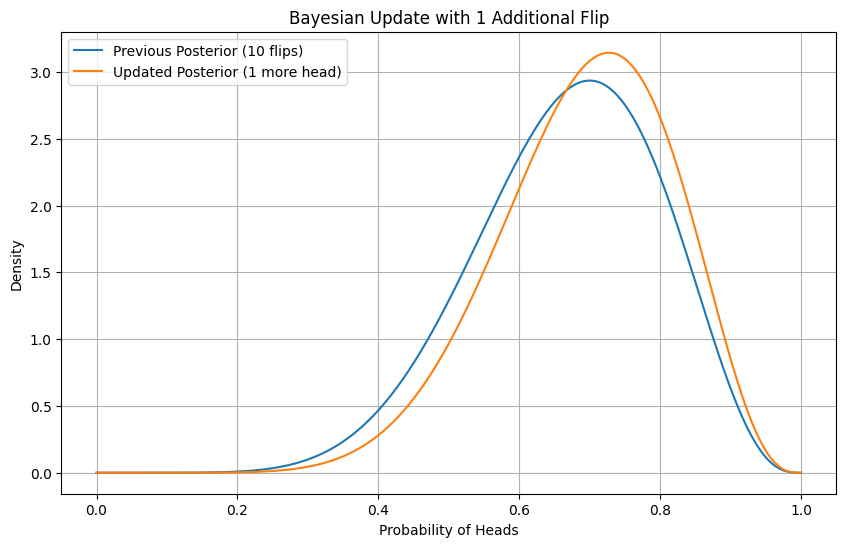

In [4]:
# -----------------------------------------
# Now you flip the coin once more and get HEAD
# Update prior to be the previous posterior
alpha_prior = alpha_post
beta_prior = beta_post

# New observation: 1 head
alpha_post = alpha_prior + 1
beta_post = beta_prior + 0  # No tails

# Plot updated posterior
posterior_updated = beta.pdf(x, alpha_post, beta_post)

plt.figure(figsize=(10, 6))
plt.plot(x, posterior, label='Previous Posterior (10 flips)')
plt.plot(x, posterior_updated, label='Updated Posterior (1 more head)')
plt.title('Bayesian Update with 1 Additional Flip')
plt.xlabel('Probability of Heads')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


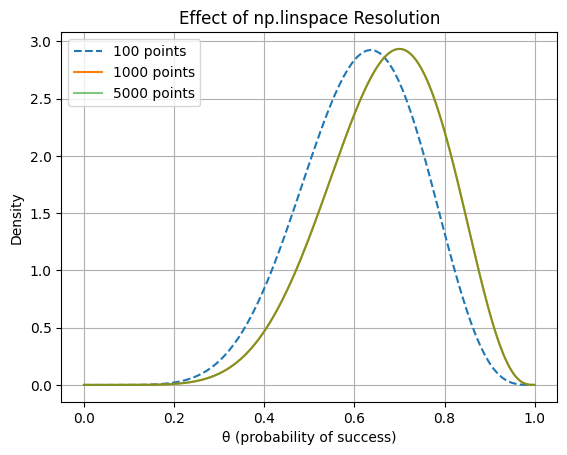

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

x1 = np.linspace(0, 1, 100)    # coarse
x2 = np.linspace(0, 1, 1000)   # smooth
x3 = np.linspace(0, 1, 5000)   # very smooth

y1 = beta.pdf(x1, 8,5 )
y2 = beta.pdf(x2, 8, 4)
y3 = beta.pdf(x3, 8, 4)

plt.plot(x1, y1, label='100 points', linestyle='--')
plt.plot(x2, y2, label='1000 points')
plt.plot(x3, y3, label='5000 points', alpha=0.6)
plt.legend()
plt.title("Effect of np.linspace Resolution")
plt.xlabel("θ (probability of success)")
plt.ylabel("Density")
plt.grid(True)
plt.show()


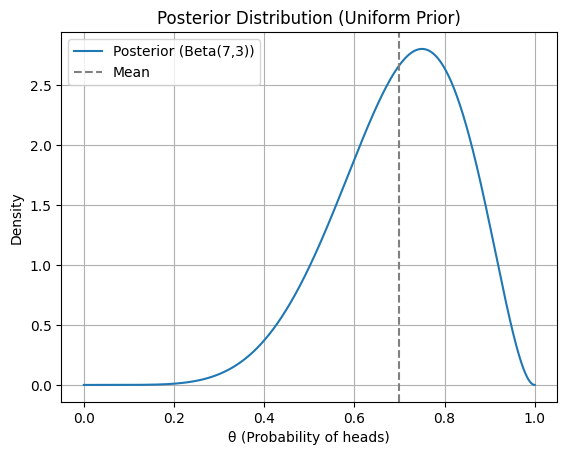

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Simulate 6 heads, 2 tails (Binomial)
alpha_prior = 1  # Uniform prior
beta_prior = 1

alpha_post = alpha_prior + 6
beta_post = beta_prior + 2

x = np.linspace(0, 1, 1000)
posterior = beta.pdf(x, alpha_post, beta_post)

plt.plot(x, posterior, label='Posterior (Beta(7,3))')
plt.axvline(x=np.mean(x * posterior), color='gray', linestyle='--', label='Mean')
plt.title("Posterior Distribution (Uniform Prior)")
plt.xlabel('θ (Probability of heads)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# normal beta Probability density function formula for computing pdf within Bayes theorem

def _pdf(self, x, a, b):
    return x**(a-1) * (1-x)**(b-1) / special.beta(a, b)


In [ ]:
# gamma Probability density function formula for computing pdf within Bayes theorem
def gamma_pdf_manual(x, a, b):
    return (b**a) * (x**(a - 1)) * np.exp(-b * x) / special.gamma(a)


In [12]:
import numpy as np
from scipy.special import gamma

def beta_pdf_manual(x, a, b):
    # Compute Beta function B(a,b)
    B = gamma(a) * gamma(b) / gamma(a + b)
    # Compute PDF values
    pdf = (x**(a-1)) * ((1 - x)**(b-1)) / B
    return pdf

# Example usage
x_vals = np.linspace(0, 1, 1000)
a = 2.5
b = 3.0

pdf_manual = beta_pdf_manual(x_vals, a, b)

# Compare with scipy.stats.beta.pdf
from scipy.stats import beta
pdf_scipy = beta.pdf(x_vals, a, b)

# Check max absolute difference
print("Max difference:", np.max(np.abs(pdf_manual - pdf_scipy)))


Max difference: 1.5543122344752192e-15


# Poisson - Gamma model for count data

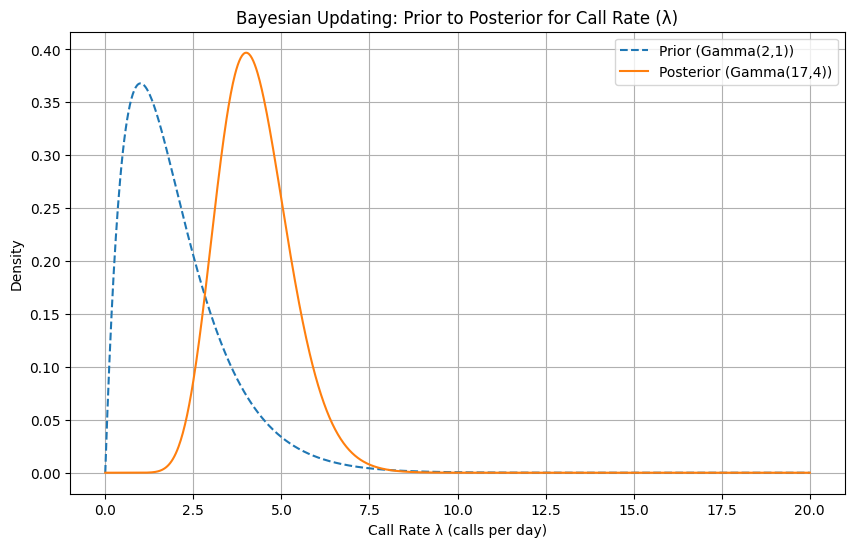

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, poisson

# Initial prior parameters for call rate λ
# Prior belief: Gamma(2, 1) — moderate belief in λ ≈ 2 calls/day
alpha_prior = 2  # ↔ α₀: prior 'pseudo-count' of total calls
beta_prior = 1   # ↔ β₀: prior 'pseudo-count' of days (exposure)

# Observed data — used in the likelihood
# For example, 12 calls observed over 3 days
observed_calls = 15  # ↔ y: total observed call count
observed_days = 3    # ↔ t: total time or exposure

# Bayesian update step using conjugacy of Gamma prior with Poisson likelihood
alpha_post = alpha_prior + observed_calls   # ↔ α_post = α_prior + y
beta_post = beta_prior + observed_days      # ↔ β_post = β_prior + t

# Plot prior and posterior
# λ ∈ [0, 20], the domain of the Poisson rate parameter
x = np.linspace(0, 20, 1000)  # Create 1000 points between 0 and 20 for λ

# Compute prior and posterior density values
# These represent before and after belief distributions over the call rate λ
prior = gamma.pdf(x, a=alpha_prior, scale=1 / beta_prior)
posterior = gamma.pdf(x, a=alpha_post, scale=1 / beta_post)

plt.figure(figsize=(10, 6))
plt.plot(x, prior, label=f'Prior (Gamma({alpha_prior},{beta_prior}))', linestyle='--')
plt.plot(x, posterior, label=f'Posterior (Gamma({alpha_post},{beta_post}))')
plt.title('Bayesian Updating: Prior to Posterior for Call Rate (λ)')
plt.xlabel('Call Rate λ (calls per day)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


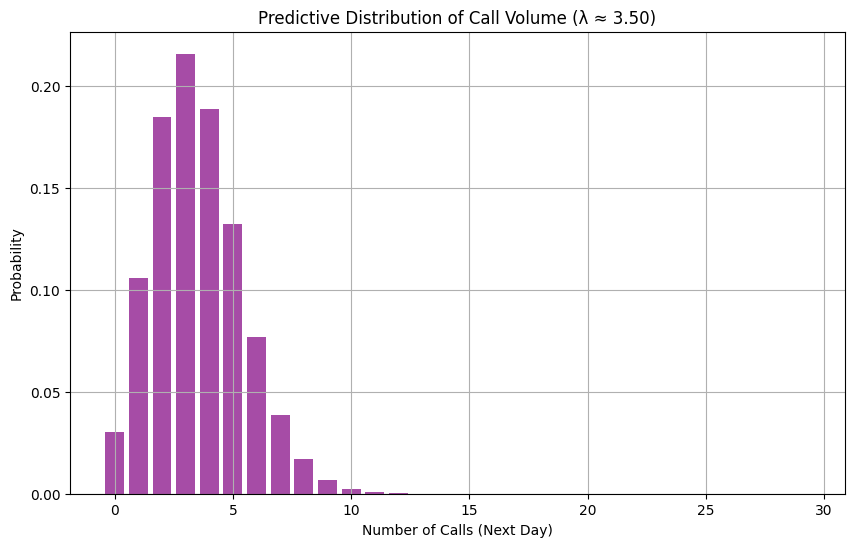

In [2]:
# Predictive distribution: expected call volume for next day
lambda_pred = alpha_post / beta_post  # Posterior mean of λ
call_range = np.arange(0, 30)         # Possible call counts from 0 to 29
predictive = poisson.pmf(call_range, mu=lambda_pred)

plt.figure(figsize=(10, 6))
plt.bar(call_range, predictive, color='purple', alpha=0.7)
plt.title(f'Predictive Distribution of Call Volume (λ ≈ {lambda_pred:.2f})')
plt.xlabel('Number of Calls (Next Day)')
plt.ylabel('Probability')
plt.grid(True)
plt.show()


In [ ]:

# poisson distribution prediction using gamma rate parameter to sample and create poisson dist
import numpy as np

# Posterior belief about λ (Gamma-distributed)
alpha_post = 17  # Updated shape parameter
beta_post = 4    # Updated rate parameter

# Sample λ (event rate) from the Gamma distribution
sampled_lambda = np.random.gamma(shape=alpha_post, scale=1/beta_post, size=1000)

# Use sampled λ to generate Poisson-distributed event counts
poisson_counts = np.random.poisson(lam=sampled_lambda.mean(), size=7)  # Forecast for 7 days

print(f"Predicted event counts for the next 7 days: {poisson_counts}")


Predicted event counts for the next 7 days: [5 6 6 2 3 3 5]


Sample using Markov Chain Monte Carlo

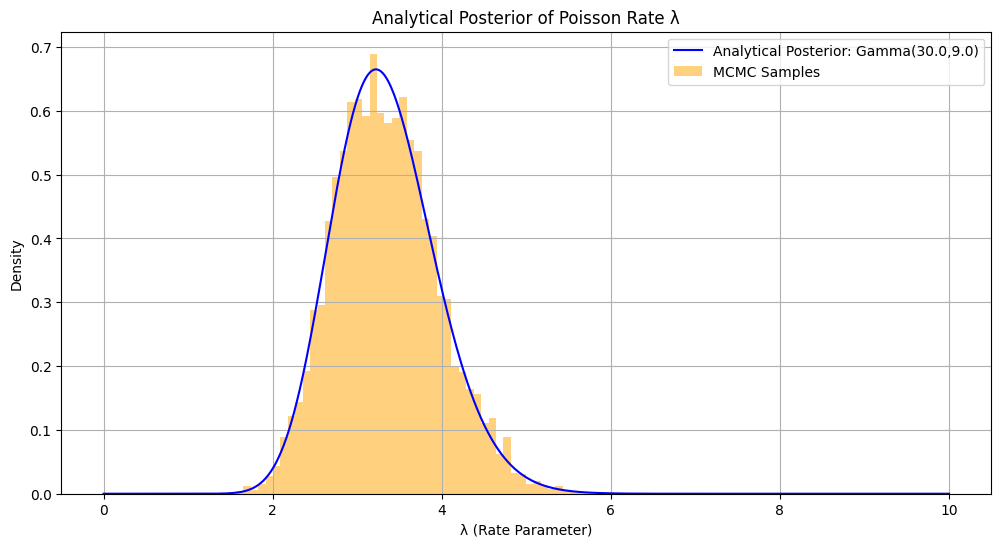

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, poisson
import random

# Step 1: Simulated count data from a Poisson process (e.g., call volume or sensor pulses)
observed_counts = [3, 2, 4, 3, 6, 3, 2, 5]  # Example observed counts at a fixed depth
n_obs = len(observed_counts)
sum_counts = sum(observed_counts)

# Step 2: Prior parameters for Gamma(α, β)
alpha_prior = 2.0
beta_prior = 1.0

# Step 3: Compute posterior parameters (conjugate update)
alpha_post = alpha_prior + sum_counts
beta_post = beta_prior + n_obs

# Step 4: Plot analytical posterior
x = np.linspace(0, 10, 1000)
posterior_pdf = gamma.pdf(x, a=alpha_post, scale=1/beta_post)

plt.figure(figsize=(12, 6))
plt.plot(x, posterior_pdf, label=f'Analytical Posterior: Gamma({alpha_post},{beta_post})', color='blue')
plt.title("Analytical Posterior of Poisson Rate λ")
plt.xlabel("λ (Rate Parameter)")
plt.ylabel("Density")
plt.grid(True)

# Step 5: MCMC sampling using Metropolis-Hastings
def log_posterior(lam):
    if lam <= 0:
        return -np.inf
    log_likelihood = sum(poisson.logpmf(observed_counts, lam))
    log_prior = gamma.logpdf(lam, alpha_prior, scale=1/beta_prior)
    return log_likelihood + log_prior

n_samples = 10000
samples = []
current = 3.0  # Start near the center
for _ in range(n_samples):
    proposal = np.random.normal(current, 0.5)
    log_accept_ratio = log_posterior(proposal) - log_posterior(current)
    if np.log(random.uniform(0, 1)) < log_accept_ratio:
        current = proposal
    samples.append(current)

# Step 6: Plot histogram of MCMC samples
plt.hist(samples, bins=50, density=True, alpha=0.5, label='MCMC Samples', color='orange')
plt.legend()
plt.show()
